In [1]:
import sys, re, os
import numpy as np
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.rc('font', family='serif')
plt.rcParams.update({'font.size': 11})

plt.rcParams['figure.dpi'] = 200
plt.rcParams['savefig.dpi'] = 300

In [3]:
# Change the work directory to the parent
try:
    if chdir:
        pass
except:
    current_dir = os.getcwd()
    os.chdir(current_dir +"/..")
    os.path.abspath(os.curdir)

In [4]:
chdir = True

In [5]:
import itertools
marker = itertools.cycle(('x',',', '+', '.', 'o', '*'))
cycol = itertools.cycle('bgrcmk')

In [6]:
# Some helper functions
def get_stat(stat_name, source="general/fastclick-varied-cbr-rates.csv", index=1):
    stat = []
    with open(source) as file:
        for line in file:
            if re.search(stat_name, line):
                stat.append(line.strip().split(',')[index])
    
    return list(map(lambda x:float(x), stat[:-1]))

def plot_stat(stat_name, ax, source, index=1):
    stat = get_stat(stat_name, source, index)
    ax.plot(stat)
    ax.grid(True)
    ax.set_title(stat_name)

def plot_stats(stat_names, source="fastclick-varied-cbr-rates.csv", index=1):
    i = 1
    fig, ax = plt.subplots(len(stat_names),2)
    for s in stat_names:
        ax = plt.subplot(len(stat_names),1, i)
        plot_stat(s, ax, source, index)
        i+=1
    fig.tight_layout()

# Service chain configuration

In [7]:
# Metadata for specific SFC configurations
exp_ls = "exp1" 
vnfs = ["firewall.csv", "nf_router.csv", "ndpi_stats.csv", "payload_scan.csv", "bridge.csv"]

In [8]:
from IPython.display import IFrame
IFrame("..\\assets\\dag.pdf", width=600, height=420)

# High-level KPIs:

In [9]:
def parse_seq(exp_type, exp_num, file, index=5):
    "Parse sequential data, specialized for the TX/RX/Latency experiments"
    tmp = []
    
    if file.startswith("latency.csv"):
        with open(os.path.join("..\\dag-1\\data", exp_type, exp_num, file)) as f:
            lines = f.readlines()[4:] if exp_type == "load_stimulus" else f.readlines()
            for line in lines:
                tmp.append(float(line.strip())/1000)
    else:
        with open(os.path.join("..\\dag-1\\data", exp_type, exp_num, file)) as f:
            next(f)
            for l in f:
                tmp.append(float(l.strip().split(",")[index]))
                
    return tmp

In [10]:
def parse_reg(exp_type, exp_num, file, stat_name, index=1):
    "Parse the Perf data"
    stat = []
    with open(os.path.join("..\\dag-1\\data", exp_type, exp_num, file)) as f:
        for line in f:
            if re.search(stat_name, line):
                stat.append(line.strip().split(',')[index])
    
    return list(map(lambda x:float(x), stat[:-1]))

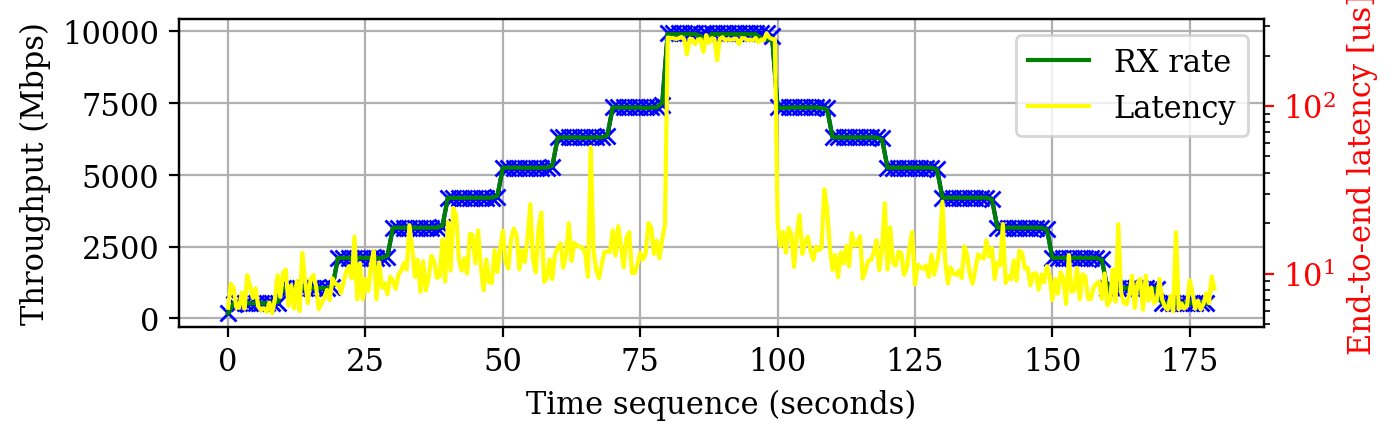

In [11]:
fig, ax = plt.subplots(figsize = (7,2))
ax.grid(True)
ax.set_xlabel("Time sequence (seconds)")
ax.set_ylabel("Throughput (Mbps)")

ax2 = ax.twinx()
ax2.tick_params(axis='y', colors='red')
ax2.set_ylabel("End-to-end latency [us]", color="red")

l = ax.plot(parse_seq("load_stimulus", exp_ls, "tx_stats.csv"), marker=next(marker), color=next(cycol), label="TX")
l1 = ax.plot(parse_seq("load_stimulus", exp_ls, "rx_stats.csv"), color=next(cycol), label="RX rate")
lat = parse_seq("load_stimulus", exp_ls, "latency.csv")
ax2.set_yscale("log")
l2 = ax2.plot(0.5*np.arange(0, len(lat)), lat, color="yellow", label="Latency")

lns = l1 + l2
labs = [l.get_label() for l in lns]
plt.legend(lns, labs)

In [12]:
def init_plt(ax2_title):
    fig, ax = plt.subplots(figsize = (7,2))
    ax.grid(True)
    ax.set_xlabel("Time sequence (seconds)")
    ax.set_ylabel("Throughput (Mbps)")

    ax2 = ax.twinx()
    ax2.tick_params(axis='y', colors='red')
    ax2.set_ylabel(ax2_title, color="red")
    
    return fig, ax, ax2

In [13]:
def plot_feature(feature, label, index=1):
    fig, ax, ax2 = init_plt(label)
    tx = parse_seq("load_stimulus", exp_ls, "tx_stats.csv")
    lns = ax.plot(tx, marker=next(marker), color=next(cycol), label="TX")

    for v in vnfs:
        data = parse_reg("load_stimulus", exp_ls, v, feature, index)
        lns += ax2.plot(data, color=next(cycol), label=v.split(".")[0])

    labs = [l.get_label() for l in lns]
    plt.legend(lns, labs, loc=1, bbox_to_anchor=(1, 1.2), ncol=6, prop={'size': 7})

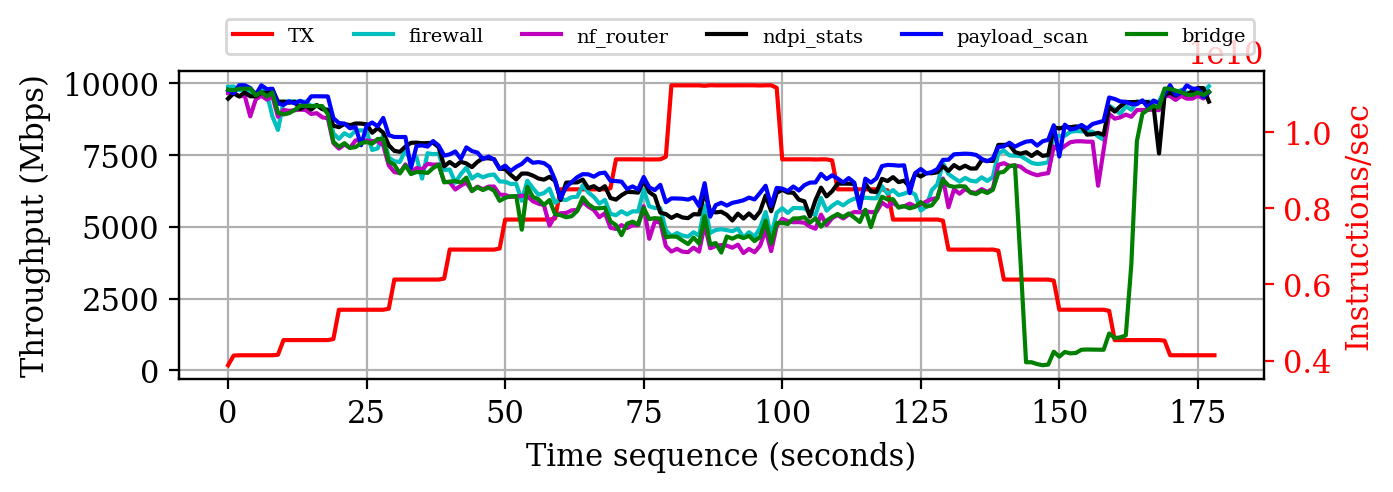

In [14]:
plot_feature("instructions", "Instructions/sec")

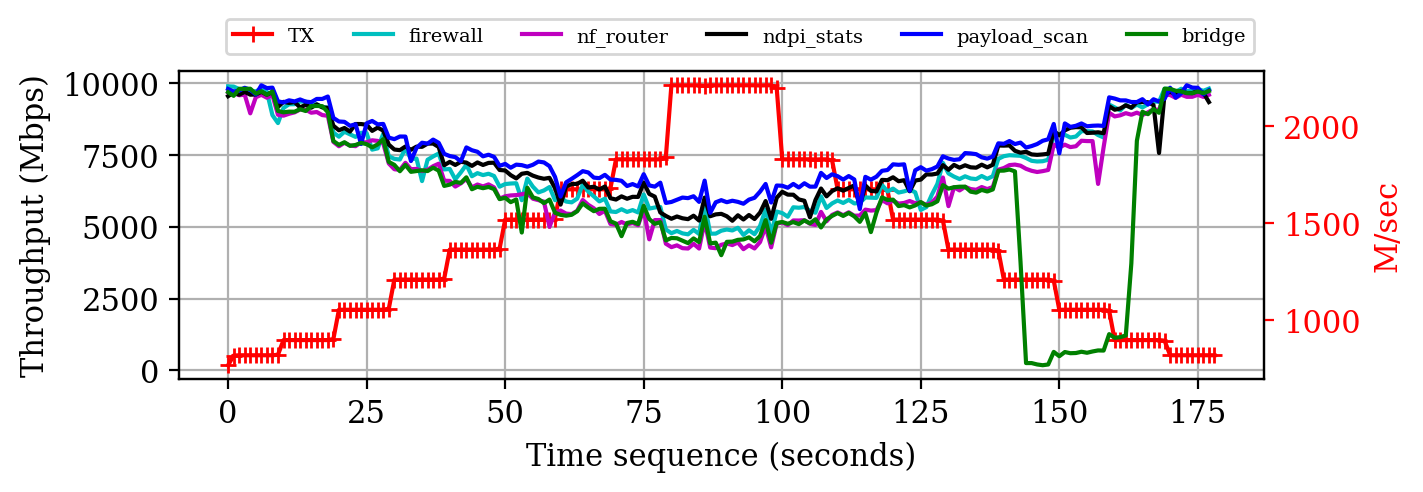

In [15]:
plot_feature("branches,", "M/sec", 7)

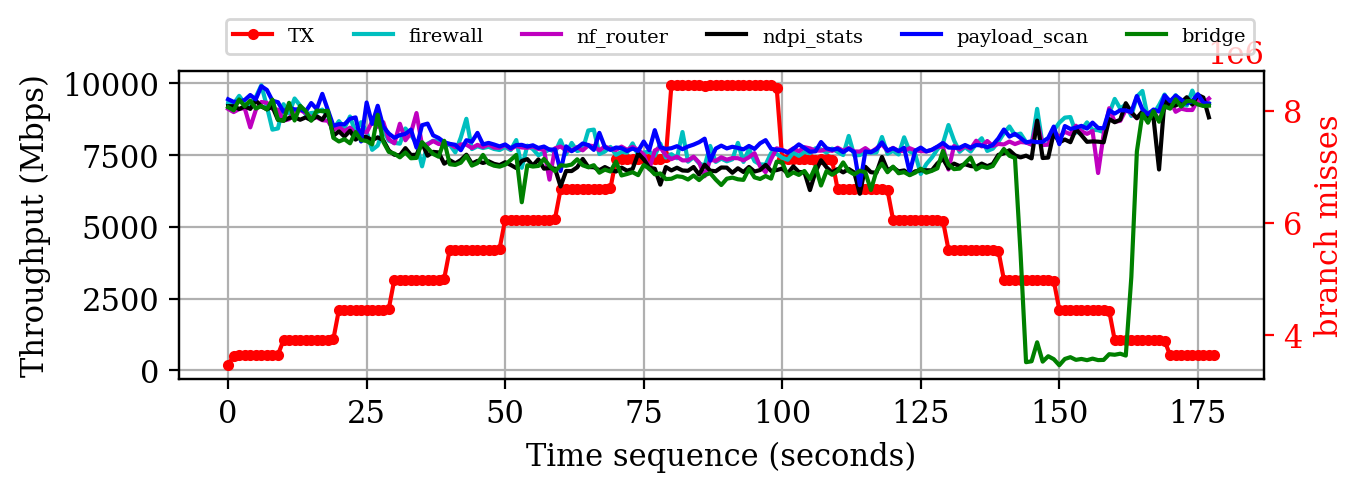

In [16]:
plot_feature("branch-misses,", "branch misses")

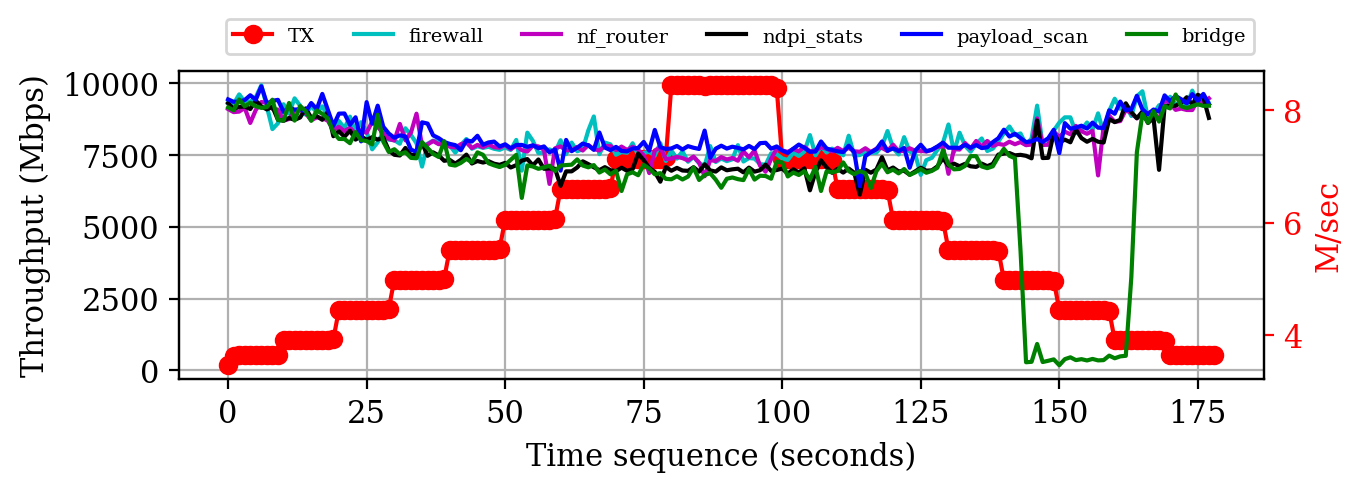

In [17]:
plot_feature("branch-load-misses,", "M/sec", 7)

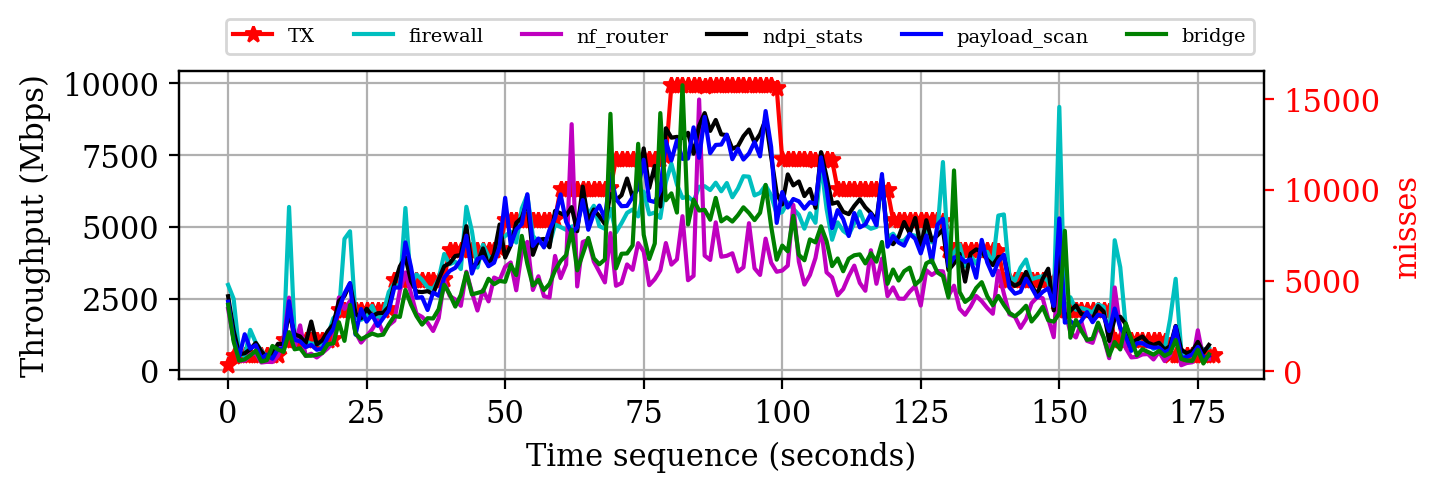

In [18]:
plot_feature("cache-misses", "misses", )

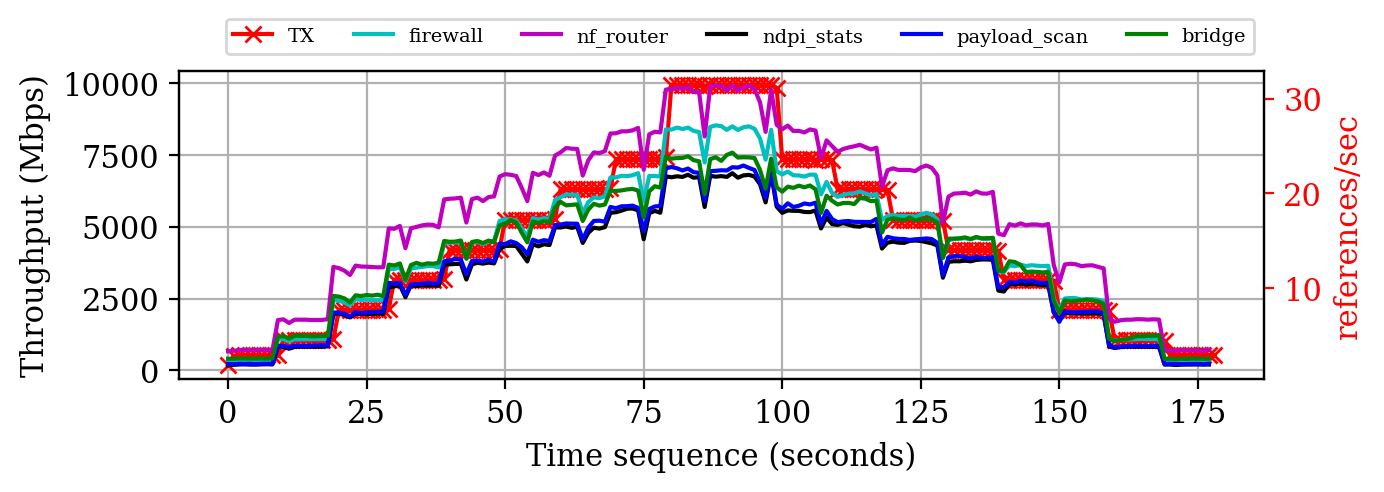

In [19]:
plot_feature("cache-references", "references/sec", 7)

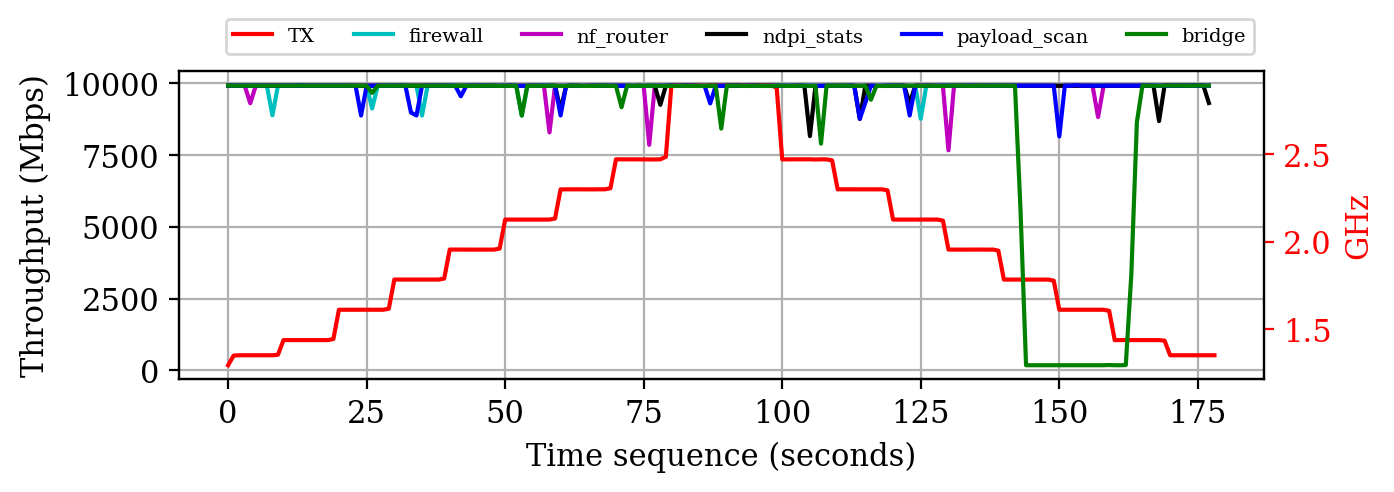

In [20]:
plot_feature(",cycles,", "GHz", 7)

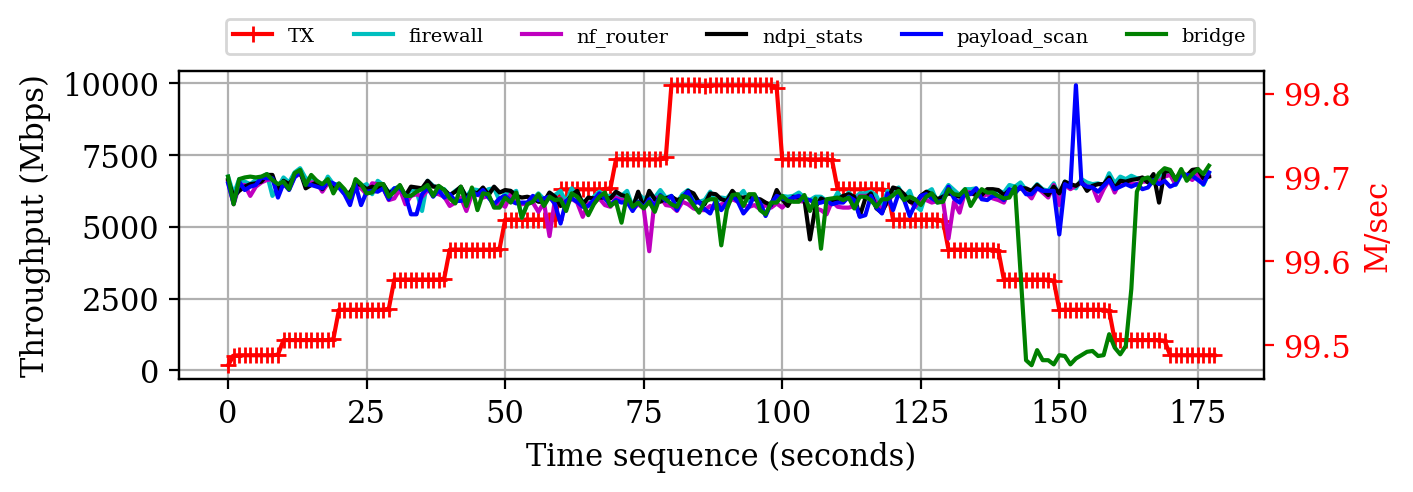

In [21]:
plot_feature("bus-cycles", "M/sec", 7)

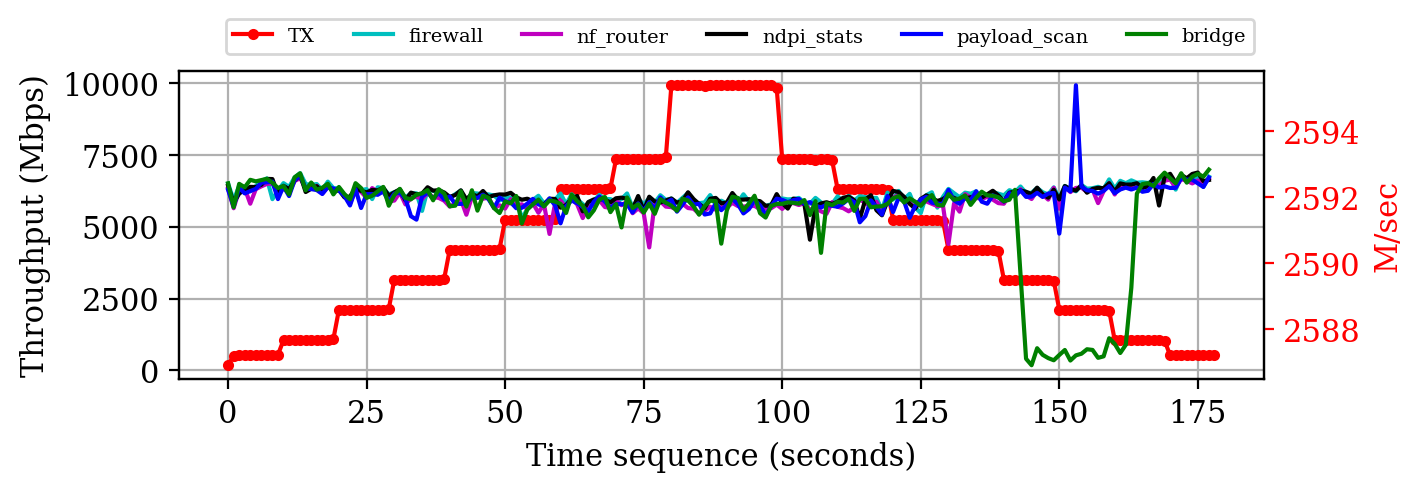

In [22]:
plot_feature("ref-cycles", "M/sec", 7)

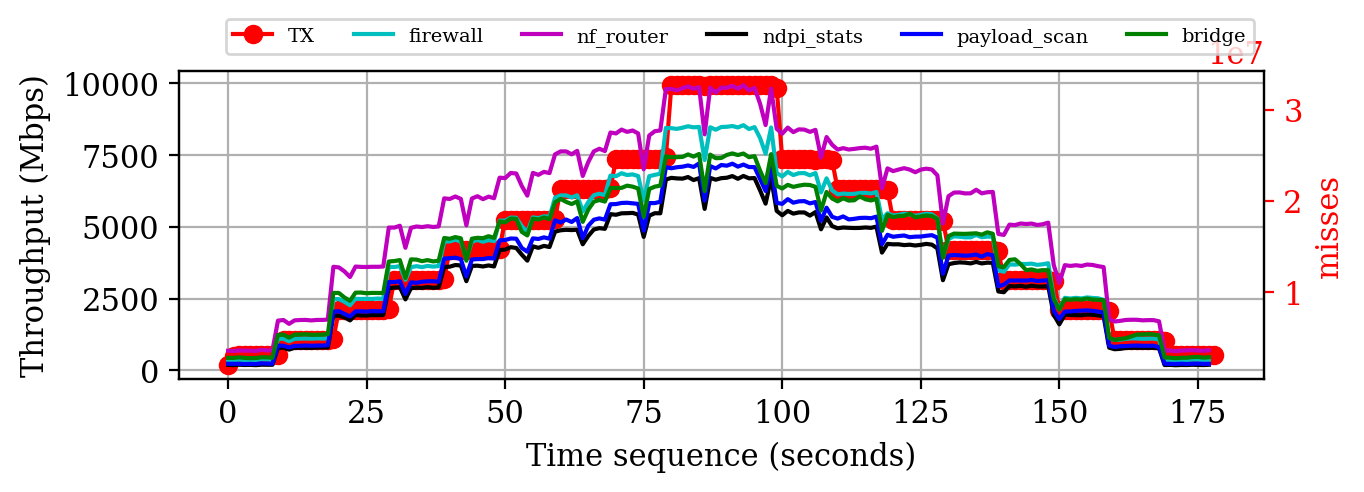

In [23]:
plot_feature("L1-dcache-load-misses", "misses")

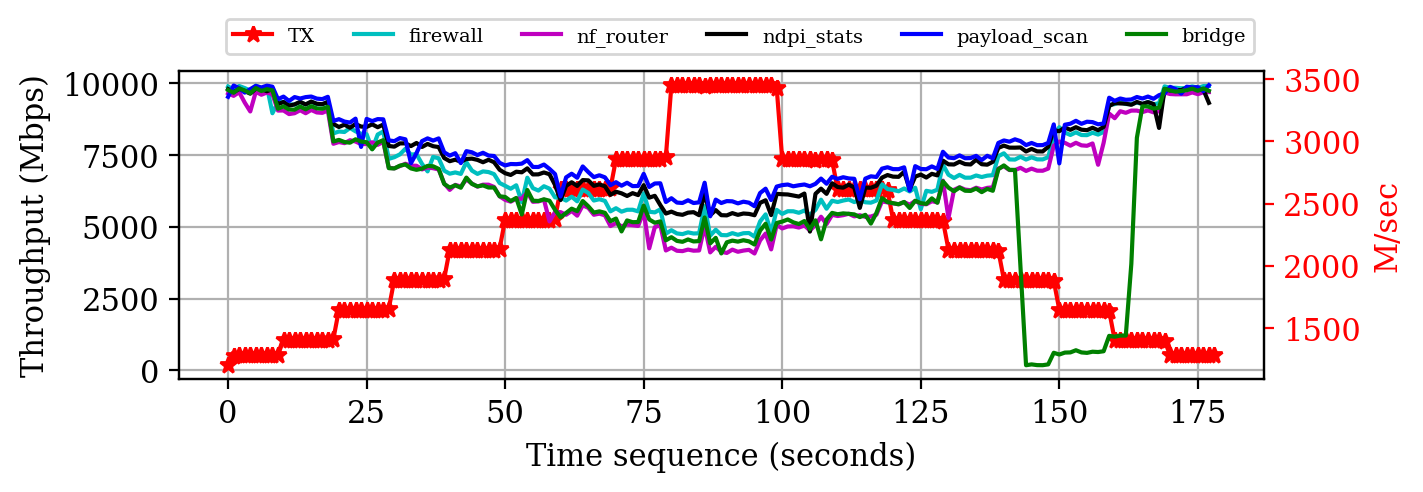

In [24]:
plot_feature("L1-dcache-loads", "M/sec", 7)

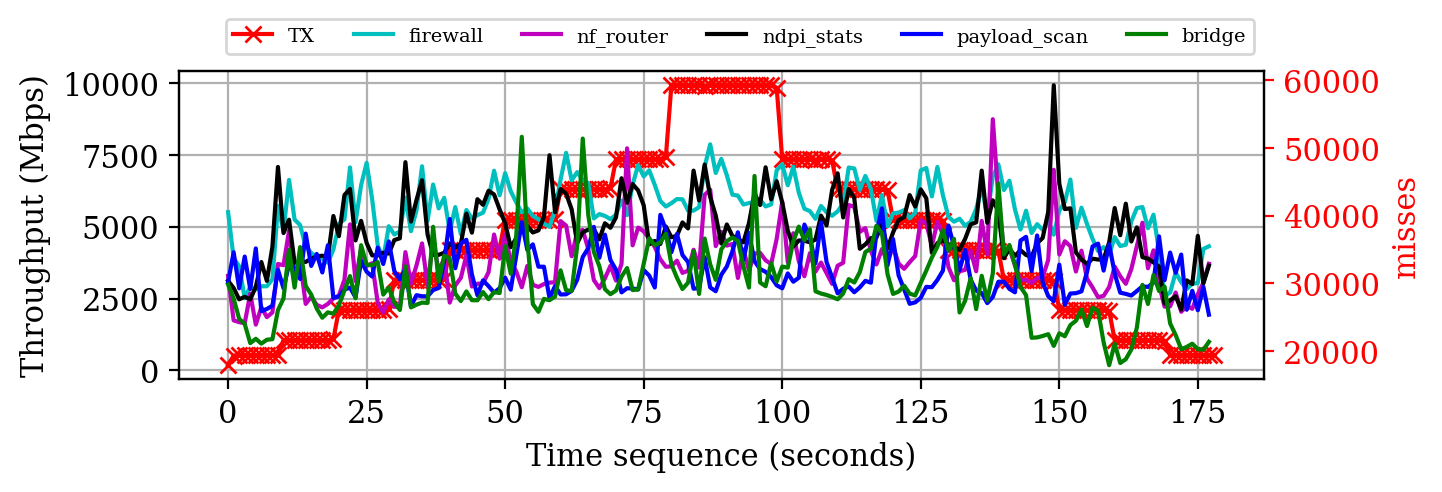

In [25]:
plot_feature("L1-icache-load-misses", "misses", )

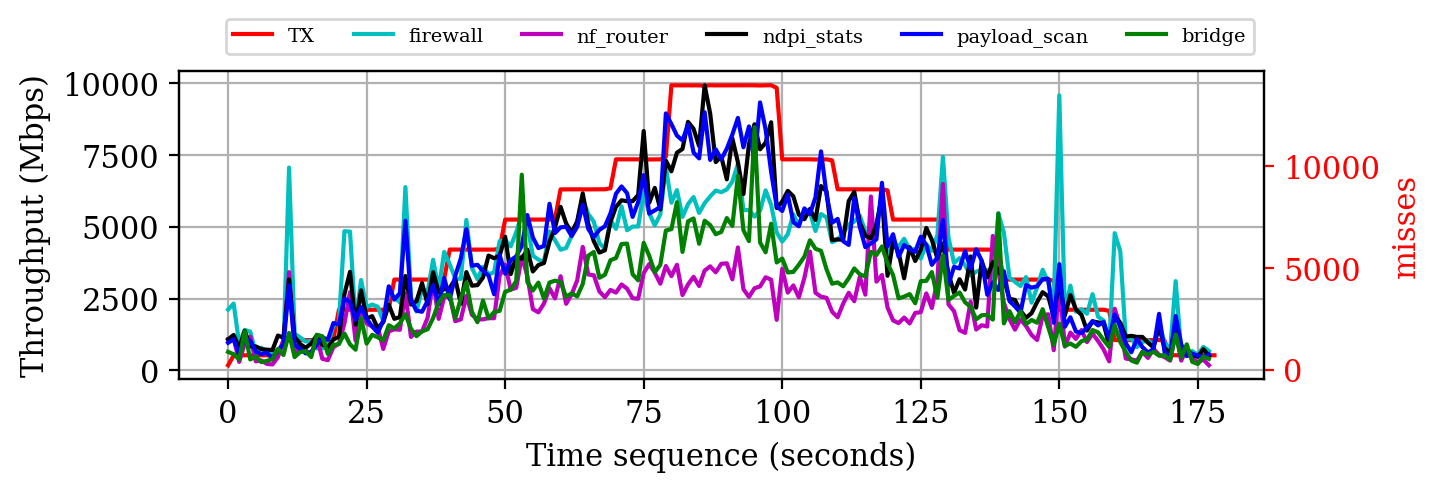

In [26]:
plot_feature("LLC-load-misses", "misses", )

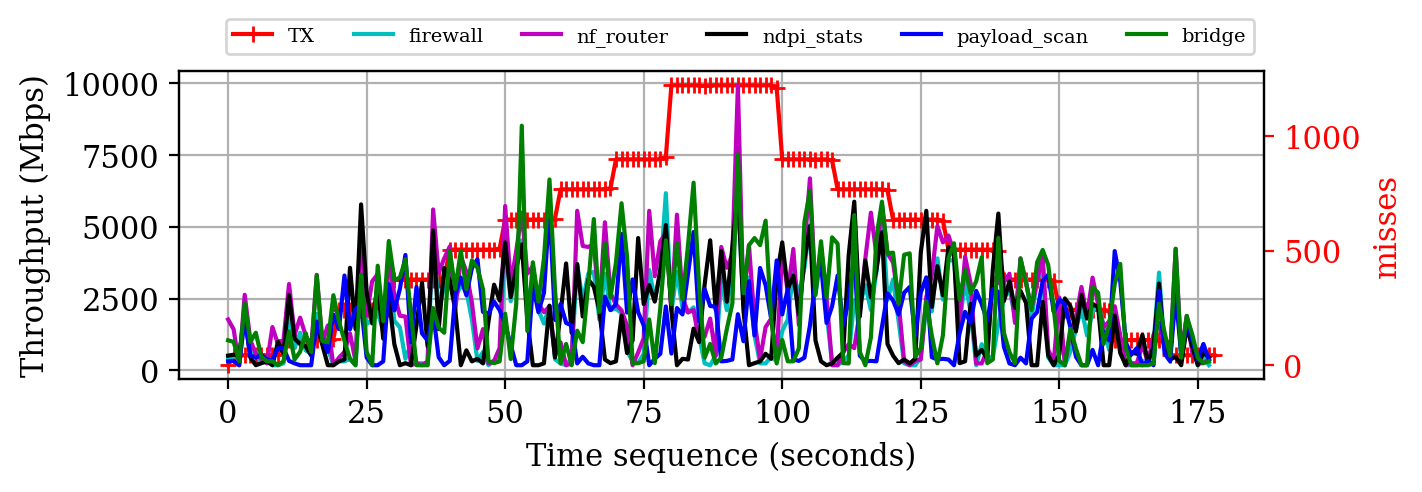

In [27]:
plot_feature("LLC-store-misses", "misses", )

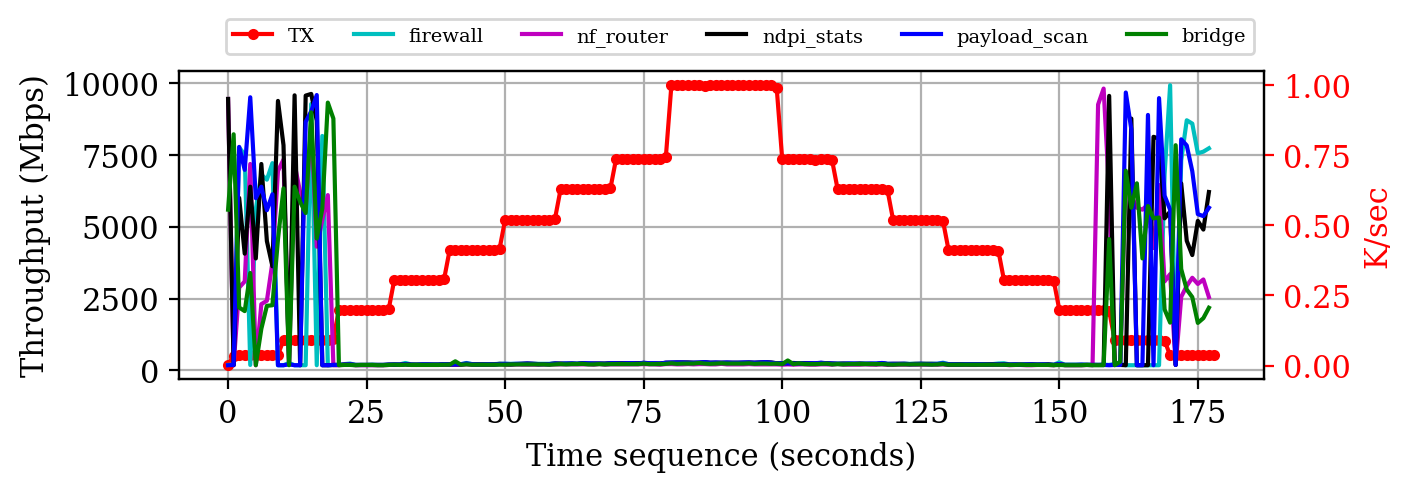

In [28]:
plot_feature("node-loads", "K/sec", 7)

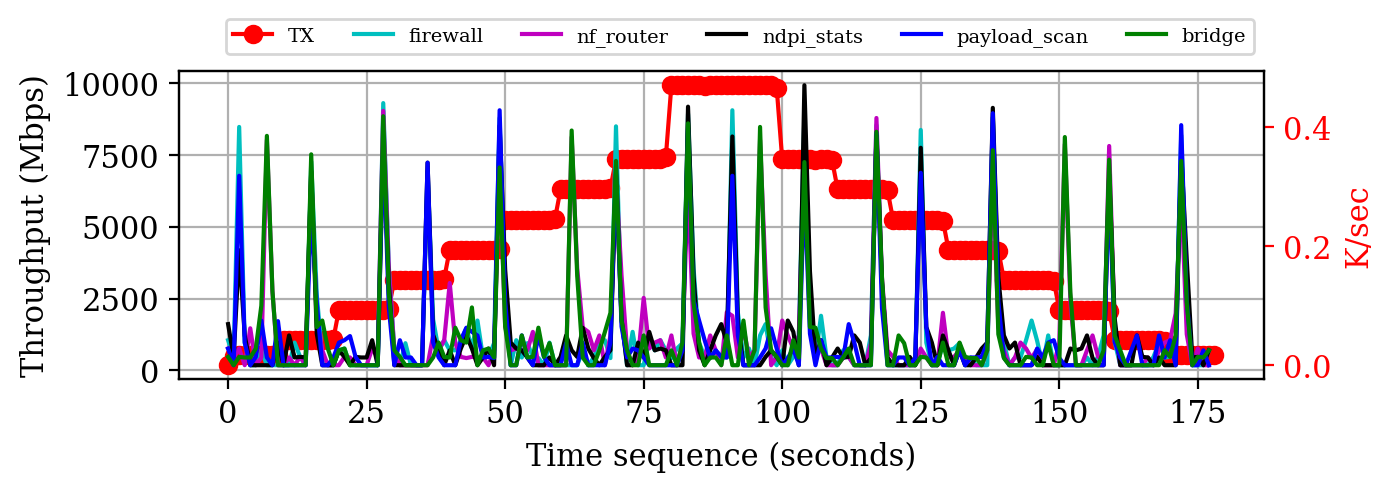

In [29]:
plot_feature("node-store-misses", "K/sec", 7)

#  Data process

In [30]:
current_dir = os.getcwd()

exp_ls_csv  = "load_stimulus_" + exp_ls + ".csv"

file_path = os.path.abspath(os.path.join("..\\dag-1\\datasets", exp_ls_csv))

data = pd.read_csv(file_path, index_col=0)
data = data.replace(['<not counted>'], np.nan)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 178 entries, 0 to 177
Data columns (total 63 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   input_rate                          178 non-null    float64
 1   output_rate                         178 non-null    float64
 2   latency                             178 non-null    float64
 3   firewall_instructions               178 non-null    float64
 4   nf_router_instructions              178 non-null    float64
 5   ndpi_stats_instructions             178 non-null    float64
 6   payload_scan_instructions           178 non-null    float64
 7   bridge_instructions                 178 non-null    float64
 8   firewall_branches                   178 non-null    float64
 9   nf_router_branches                  178 non-null    float64
 10  ndpi_stats_branches                 178 non-null    float64
 11  payload_scan_branches               178 non-n

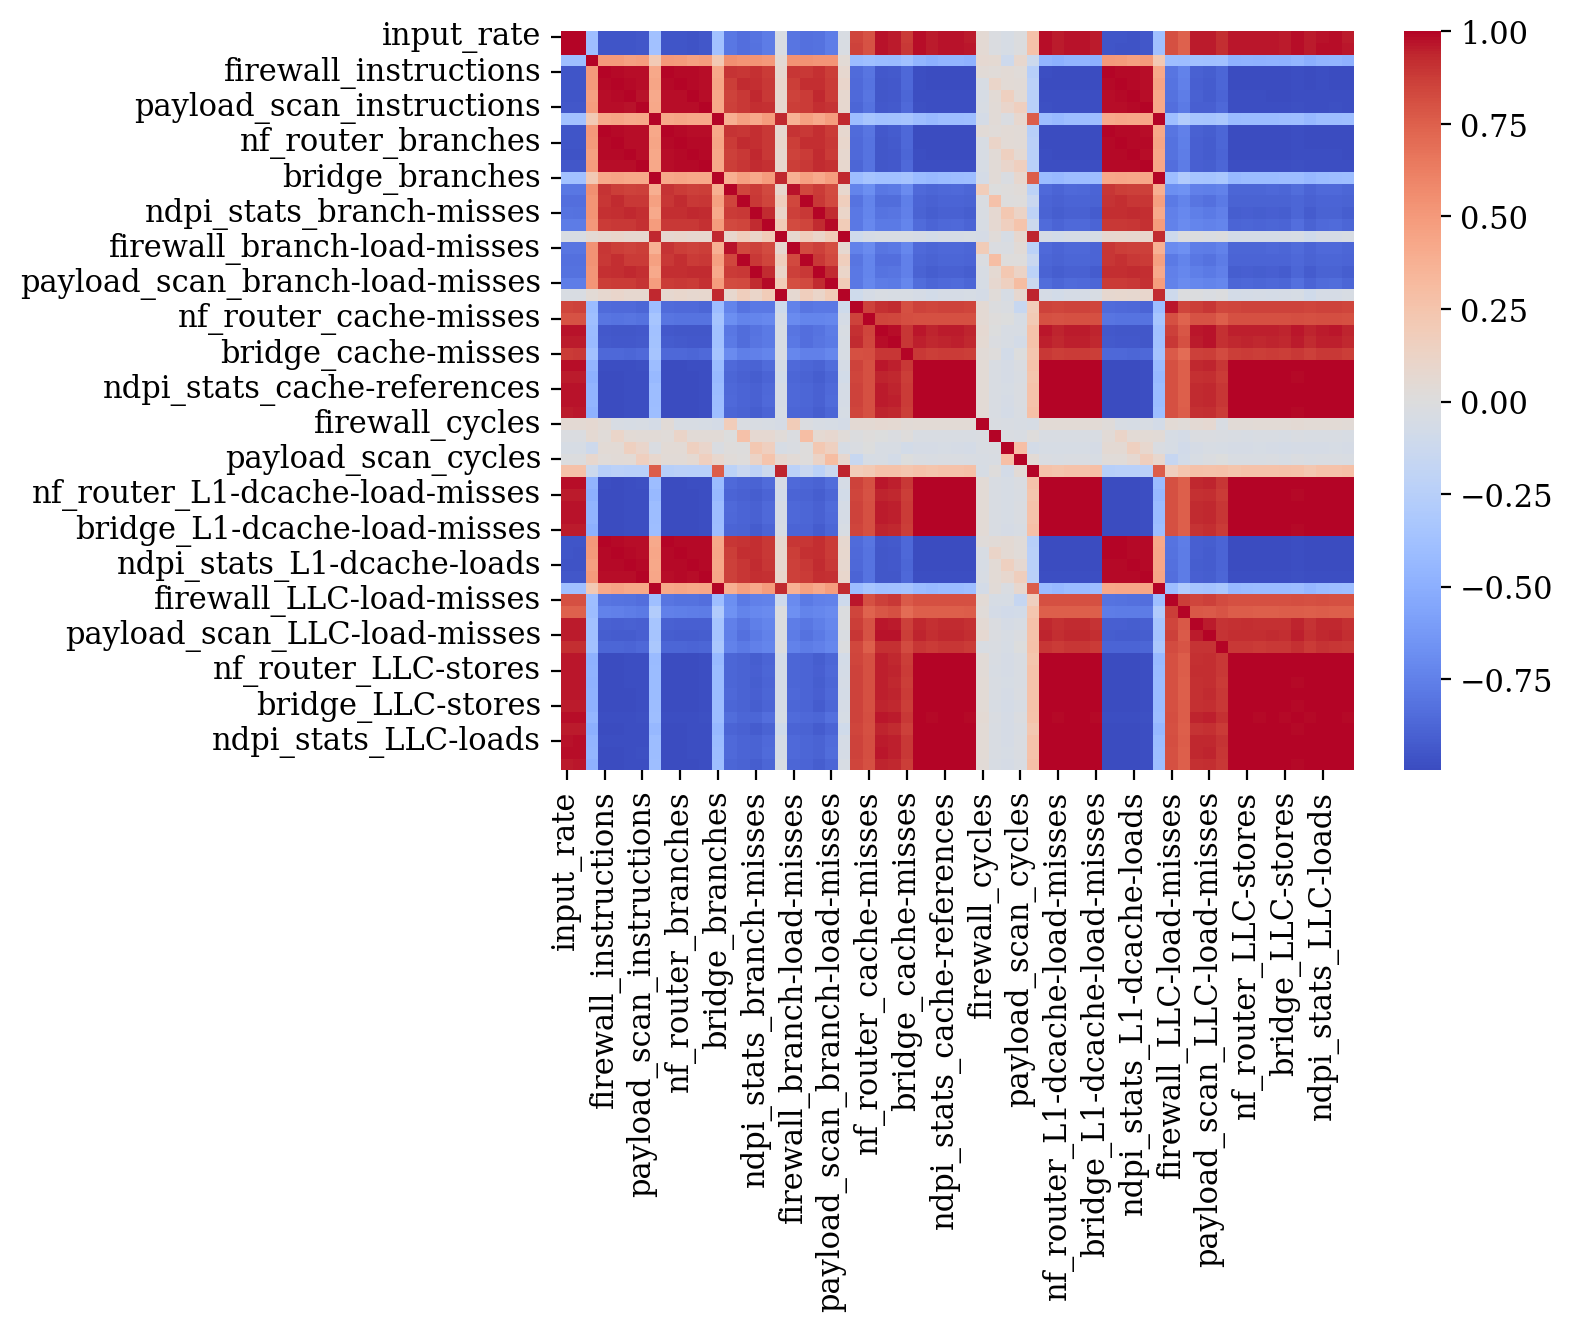

In [31]:
# heatmap
import seaborn as sns   
corr = data.corr()
plt.figure()
sns.heatmap(corr, cmap="coolwarm", annot=False, fmt=".2f")

abs_path = os.path.join("..\\dag-1\\figure", "heatmap_ls_"+ exp_ls +'.pdf')
plt.savefig(abs_path)
plt.show()

In [32]:
from collections import defaultdict

def plot_cor(x, y):
    dict_values = defaultdict(int)
    dict_times = defaultdict(int)

    for i in range(len(x)):
        dict_values[x[i]] += y[i]
        dict_times[x[i]] += 1

    for key in dict_values.keys():
        dict_values[key] = dict_values[key] / dict_times[key]

    new_x = np.array(list(dict_values.keys()))
    new_y = []
    for i in range(len(new_x)):
        new_y.append(dict_values[new_x[i]])

    index = np.argsort(new_x)
    new_x = new_x[index]
    new_y = np.array(new_y)[index]
    return [new_x,new_y]

In [33]:
# linear regression

from sklearn.linear_model import LinearRegression

def linear_regression(a, b):
    # Convert the input lists to numpy arrays
    x = np.array(a)
    y = np.array(b)

    # Reshape the arrays to be 2D
    x = x.reshape(-1, 1)
    y = y.reshape(-1, 1)

    # Create and fit a linear regression model
    model = LinearRegression()
    model.fit(x, y)
    r2 = model.score(x, y)
    # Use the model to make predictions
    y_pred = model.predict(x)

    # Return the predicted values
    return y_pred,r2

In [36]:
# polynomial regression

import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score


def polynomial_regression(x, y, degree):
    
    # Reshape the arrays to be 2D
    
    x = np.array(x)
    y = np.array(y)

    # Transform the input data into a matrix of polynomial features
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(x.reshape(-1, 1))

    # Create a linear regression model and fit it to the data
    model = LinearRegression()
    model.fit(X_poly, y)
    y_pred = model.predict(X_poly)
    # model score
    r2 = r2_score(y, y_pred)
    # Return the coefficients of the polynomial equation
    return model.coef_, y_pred,r2

# Co-relationship between 'input rate' and 'instructions'

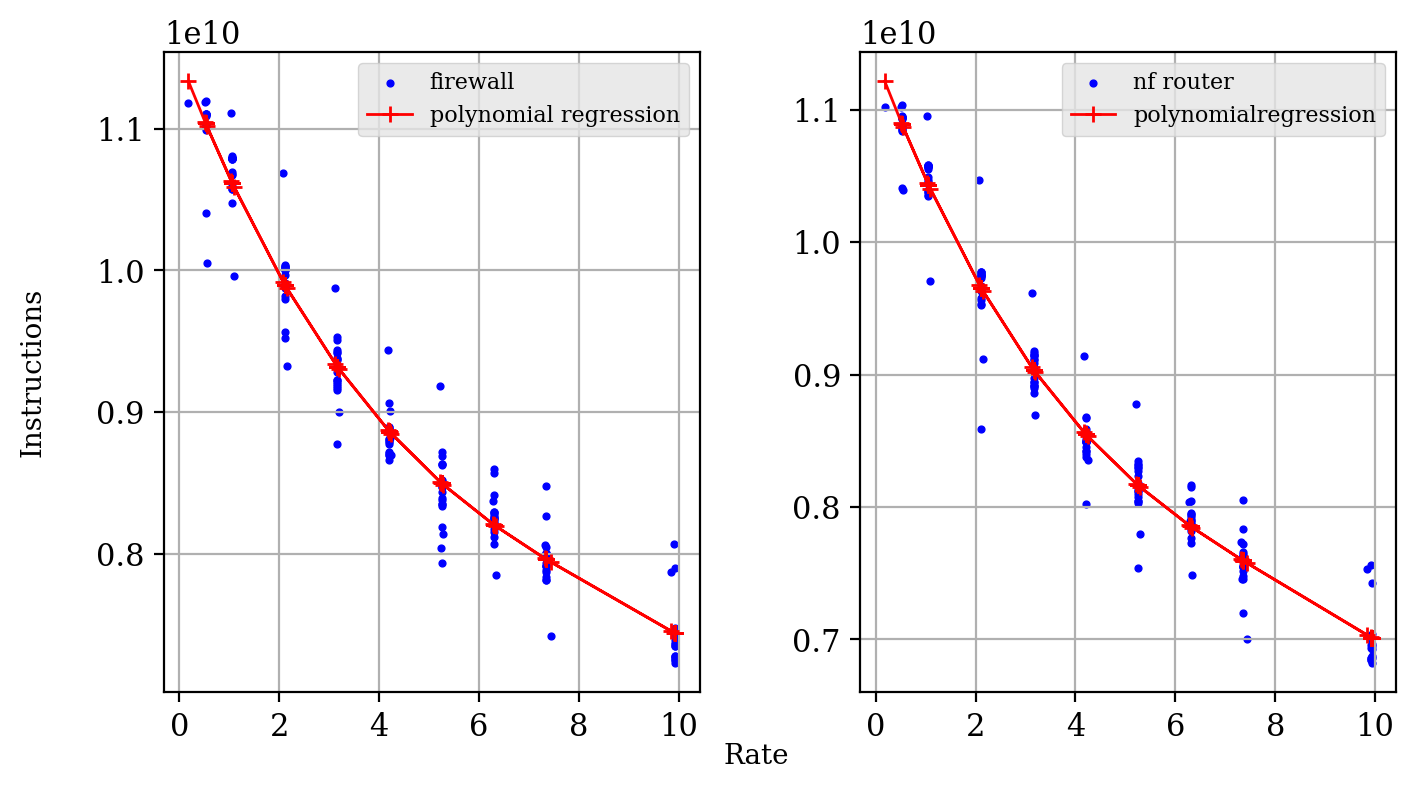

In [37]:
a = list(data['input_rate'])
b = list(data['firewall_instructions'])
c = list(data['nf_router_instructions'])


coef, y_pred,r2 =polynomial_regression(a, b, 3)
coef,y_pred_nf,r2_nf = polynomial_regression(a,c,3)

fig, ax = plt.subplots(1, 2, figsize=(8, 4), facecolor="white")
plt.style.use('ggplot')

#fig.suptitle('Correlation between rate and VNF instructions', size='12')

l4 = ax[0].scatter(list(data['input_rate']/1000), b, c='b', label='firewall', s=6)
l4 = ax[0].plot(list(data['input_rate']/1000), y_pred, c='r', linewidth=1, marker = '+', label='polynomial regression')
ax[0].legend(loc="upper right", fontsize=8)
ax[0].grid(True)


l4 = ax[1].scatter(list(data['input_rate']/1000), c, c='b', label='nf router', s=6)
l4 = ax[1].plot(list(data['input_rate']/1000), y_pred_nf, c='r', linewidth=1, marker = '+', label='polynomialregression')
ax[1].legend(loc="upper right", fontsize=8)
ax[1].grid(True)


fig.text(0.5, 0.01, "Rate", size='10', ha='center')
fig.text(0.04, 0.5, 'Instructions', size='10', va='center', rotation='vertical')

# Adjust subplot spacing
plt.subplots_adjust(left=0.13, right=0.9, bottom=0.1, top=0.9, wspace=0.3, hspace=0.3)
plt.show()

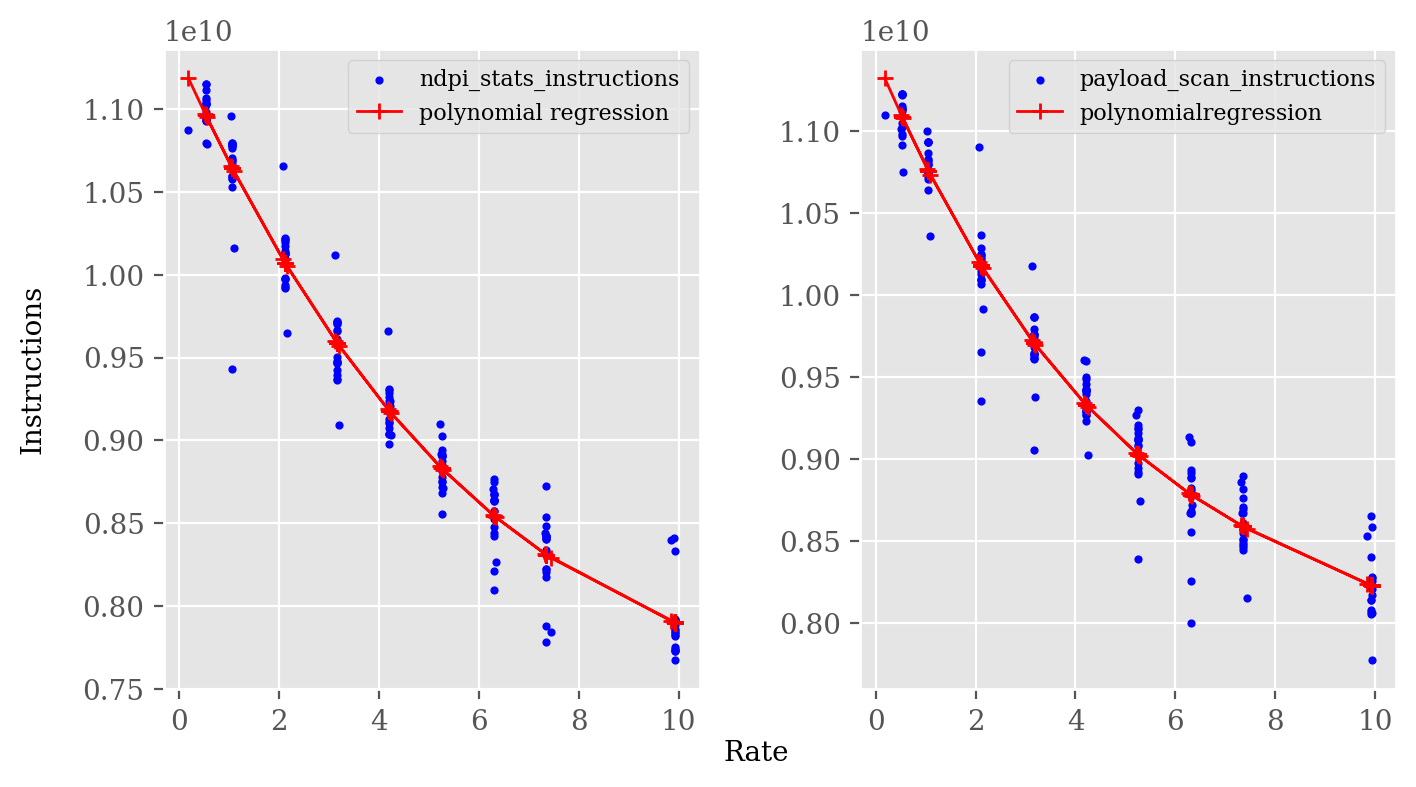

In [38]:
a = list(data['input_rate'])
b = list(data['ndpi_stats_instructions'])
c = list(data['payload_scan_instructions'])


coef, y_pred,r2 =polynomial_regression(a, b, 3)
coef,y_pred_nf,r2_nf = polynomial_regression(a,c,3)

fig, ax = plt.subplots(1, 2, figsize=(8, 4), facecolor="white")
plt.style.use('ggplot')

#fig.suptitle('Correlation between rate and VNF instructions', size='12')

l4 = ax[0].scatter(list(data['input_rate']/1000), b, c='b', label='ndpi_stats_instructions', s=6)
l4 = ax[0].plot(list(data['input_rate']/1000), y_pred, c='r', linewidth=1, marker = '+', label='polynomial regression')
ax[0].legend(loc="upper right", fontsize=8)
ax[0].grid(True)


l4 = ax[1].scatter(list(data['input_rate']/1000), c, c='b', label='payload_scan_instructions', s=6)
l4 = ax[1].plot(list(data['input_rate']/1000), y_pred_nf, c='r', linewidth=1, marker = '+', label='polynomialregression')
ax[1].legend(loc="upper right", fontsize=8)
ax[1].grid(True)


fig.text(0.5, 0.01, "Rate", size='10', ha='center')
fig.text(0.04, 0.5, 'Instructions', size='10', va='center', rotation='vertical')

# Adjust subplot spacing
plt.subplots_adjust(left=0.13, right=0.9, bottom=0.1, top=0.9, wspace=0.3, hspace=0.3)
plt.show()

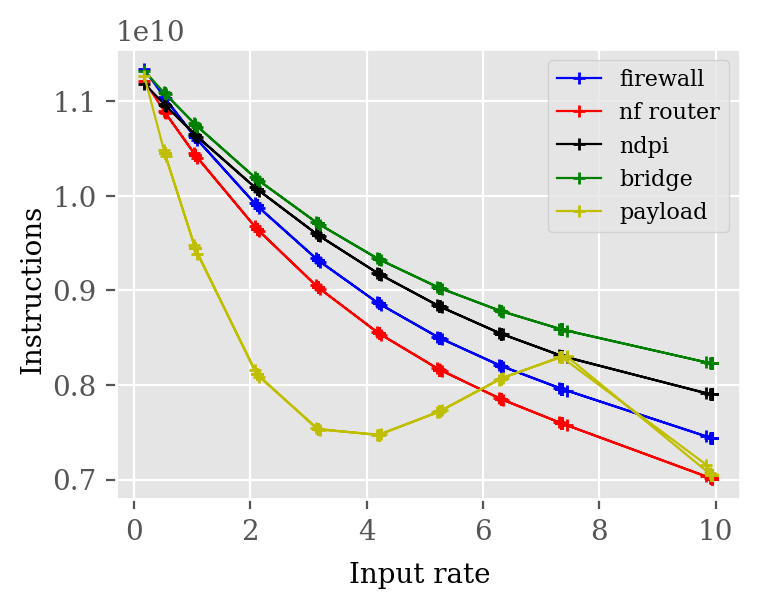

0.9632431833303556,0.9697124624747377,0.9616022132063028,0.9565050353596033,0.2968357038266949


In [39]:
# compare different VNF instruction and rate


fig, ax = plt.subplots(facecolor='white', figsize=(4, 3))
#ax.set_facecolor('white')
plt.style.use('ggplot')


# linear regression
coef,y_pred_nf,r2_nf = polynomial_regression(list(data['input_rate']), data['nf_router_instructions'],3)
coef,y_pred_f,r2_f = polynomial_regression(list(data['input_rate']), data['firewall_instructions'],3)
coef,y_pred_ndpi,r2_ndpi = polynomial_regression(list(data['input_rate']), data['ndpi_stats_instructions'],3)
coef,y_pred_pl,r2_pl = polynomial_regression(list(data['input_rate']), data['payload_scan_instructions'],3)
coef,y_pred_bg,r2_bg = polynomial_regression(list(data['input_rate']), data['bridge_instructions'],3)

# firewall
l4 = ax.plot(list(data['input_rate']/1000), y_pred_f, c='b', linewidth=0.8, marker = '+', markersize=4, label='firewall')

#nf router
l4 = ax.plot(list(data['input_rate']/1000), y_pred_nf, c='r', linewidth=0.8,  marker = '+', markersize=4,label='nf router')

# ndpi
l4 = ax.plot(list(data['input_rate']/1000), y_pred_ndpi, c='k', linewidth=0.8,  marker = '+',markersize=4, label='ndpi')

#bridge
l4 = ax.plot(list(data['input_rate']/1000), y_pred_pl, c='g', linewidth=0.8,  marker = '+', markersize=4, label='bridge')

#payload
l4 = ax.plot(list(data['input_rate']/1000), y_pred_bg, c='y', linewidth=0.8,  marker = '+', markersize=4, label='payload')
ax.legend(loc="upper right", fontsize=8)

fig.text(0.5, 0.01, "Input rate", size='10', ha='center')
fig.text(0, 0.5, 'Instructions', size='10', va='center', rotation='vertical')
plt.subplots_adjust(left=0.12, right=0.9, bottom=0.15, top=0.9, wspace=0.3, hspace=0.4)


plt.show()

print(f"{r2_f},{r2_nf},{r2_ndpi},{r2_pl},{r2_bg}")

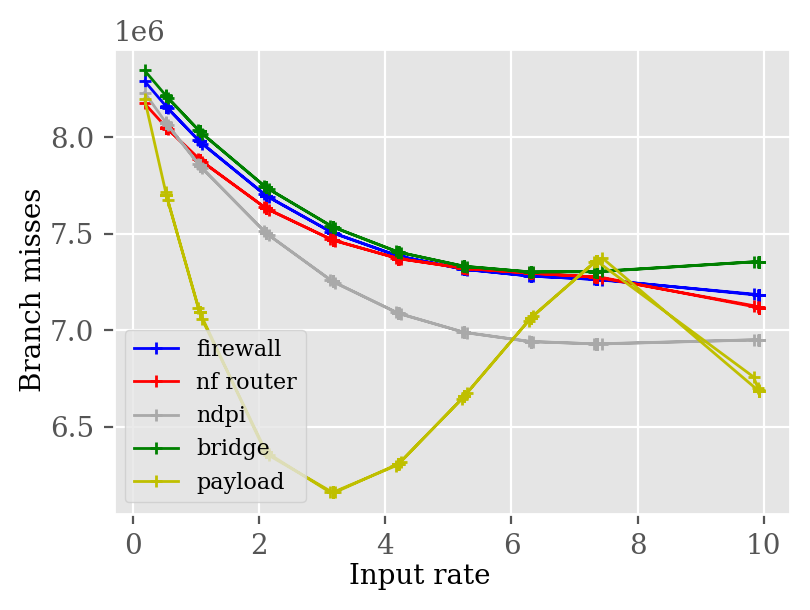

0.7980368194670955,0.8419023378743391,0.8981005015545931,0.8722595455204617,0.16198880997919474


In [40]:
# compare different VNF branches-misses and rate


fig, ax = plt.subplots(facecolor='white', figsize=(4, 3))
#ax.set_facecolor('white')
plt.style.use('ggplot')


# linear regression
coef,y_pred_nf,r2_nf = polynomial_regression(list(data['input_rate']), data['nf_router_branch-misses'],3)
coef,y_pred_f,r2_f = polynomial_regression(list(data['input_rate']), data['firewall_branch-misses'],3)
coef,y_pred_ndpi,r2_ndpi = polynomial_regression(list(data['input_rate']), data['ndpi_stats_branch-misses'],3)
coef,y_pred_pl,r2_pl = polynomial_regression(list(data['input_rate']), data['payload_scan_branch-misses'],3)
coef,y_pred_bg,r2_bg = polynomial_regression(list(data['input_rate']), data['bridge_branch-misses'],3)

# firewall
l4 = ax.plot(list(data['input_rate']/1000), y_pred_f, c='b', linewidth=1, marker = '+', markersize=4, label='firewall')

#nf router
l4 = ax.plot(list(data['input_rate']/1000), y_pred_nf, c='r', linewidth=1, marker = '+', markersize=4,label='nf router')

# ndpi
l4 = ax.plot(list(data['input_rate']/1000), y_pred_ndpi, c='darkgray', linewidth=1, marker = '+',markersize=4, label='ndpi')

#bridge
l4 = ax.plot(list(data['input_rate']/1000), y_pred_pl, c='g', linewidth=1, marker = '+', markersize=4, label='bridge')

#payload
l4 = ax.plot(list(data['input_rate']/1000), y_pred_bg, c='y', linewidth=1, marker = '+', markersize=4, label='payload')
ax.legend(loc="lower left", fontsize=8)

fig.text(0.5, 0.01, "Input rate", size='10', ha='center')
fig.text(0, 0.5, 'Branch misses', size='10', va='center', rotation='vertical')
plt.subplots_adjust(left=0.12, right=0.9, bottom=0.15, top=0.9, wspace=0.3, hspace=0.4)
plt.subplots_adjust(left=0.12, right=0.9, bottom=0.15, top=0.9, wspace=0.3, hspace=0.4)
plt.tight_layout()

plt.show()

print(f"{r2_f},{r2_nf},{r2_ndpi},{r2_pl},{r2_bg}")

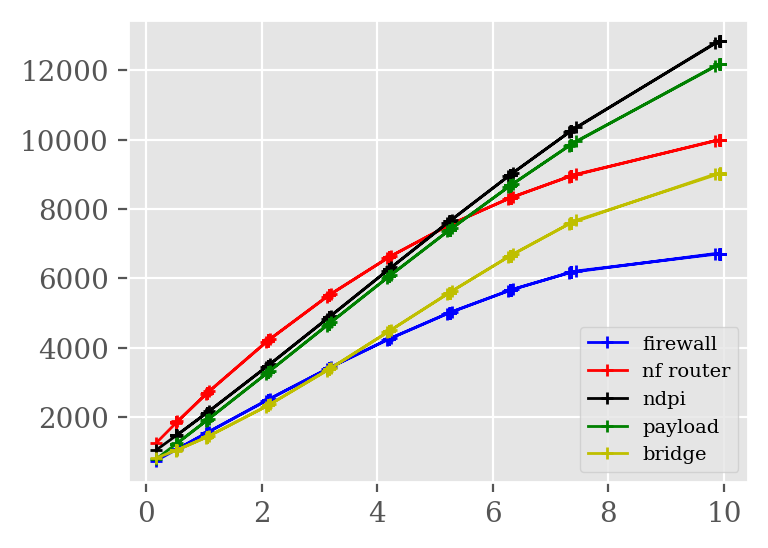

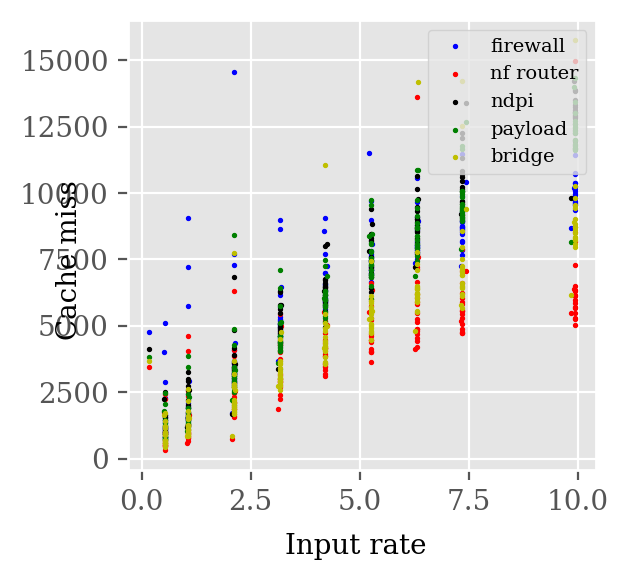

0.6751297459624032,0.7655586041357193,0.9482404850696583,0.9269892630745393,0.7880968040893892


In [41]:
# Traffic vs. caches

# cashe misses-- the performance is not good

fig, ax = plt.subplots(facecolor='white', figsize=(4, 3))
fig, ax1 = plt.subplots(facecolor='white', figsize=(3, 3))
plt.style.use('ggplot')


# linear regression
coef,y_pred_nf,r2_nf = polynomial_regression(list(data['input_rate']), data['firewall_cache-misses'],3)
coef,y_pred_f,r2_f = polynomial_regression(list(data['input_rate']), data['nf_router_cache-misses'],3)
coef,y_pred_ndpi,r2_ndpi = polynomial_regression(list(data['input_rate']), data['ndpi_stats_cache-misses'],3)
coef,y_pred_pl,r2_pl = polynomial_regression(list(data['input_rate']), data['payload_scan_cache-misses'],3)
coef,y_pred_bg,r2_bg = polynomial_regression(list(data['input_rate']), data['bridge_cache-misses'],3)

# firewall
ax.plot(list(data['input_rate']/1000), y_pred_f, c='b', linewidth=1, marker = '+', markersize=4, label='firewall')
ax1.scatter(list(data['input_rate']/1000),data['firewall_cache-misses'], c='b',s=2, label='firewall')
#nf router
ax.plot(list(data['input_rate']/1000), y_pred_nf, c='r', linewidth=1, marker = '+', markersize=4,label='nf router')
ax1.scatter(list(data['input_rate']/1000),data['nf_router_cache-misses'], c='r',s=2,label='nf router')
# ndpi
ax.plot(list(data['input_rate']/1000), y_pred_ndpi, c='k', linewidth=1, marker = '+',markersize=4, label='ndpi')
ax1.scatter(list(data['input_rate']/1000),data['ndpi_stats_cache-misses'], c='k',s=2, label='ndpi')
#bridge
ax.plot(list(data['input_rate']/1000), y_pred_pl, c='g', linewidth=1, marker = '+', markersize=4, label='payload')
ax1.scatter(list(data['input_rate']/1000),data['payload_scan_cache-misses'], c='g',s=2, label='payload')
#payload
ax.plot(list(data['input_rate']/1000), y_pred_bg, c='y', linewidth=1, marker = '+', markersize=4, label='bridge')
ax1.scatter(list(data['input_rate']/1000),data['bridge_cache-misses'], c='y',s=2, label='bridge')

ax.legend(loc="lower right", fontsize=7)
ax1.legend(loc="upper right", fontsize=7)

fig.text(0.5, 0.01, "Input rate", size='10', ha='center')
fig.text(0, 0.5, 'Cache miss', size='10', va='center', rotation='vertical')
plt.subplots_adjust(left=0.12, right=0.9, bottom=0.15, top=0.9, wspace=0.3, hspace=0.4)


#save figure
plt.show()

print(f"{r2_f},{r2_nf},{r2_ndpi},{r2_pl},{r2_bg}")

# Address translation: virtual memory

0.97,0.91,0.95,0.92,0.96
0.93,0.93,0.93,0.92,0.93
0.93,0.97,0.98,0.97,0.98
0.93,0.97,0.97,0.97,0.97


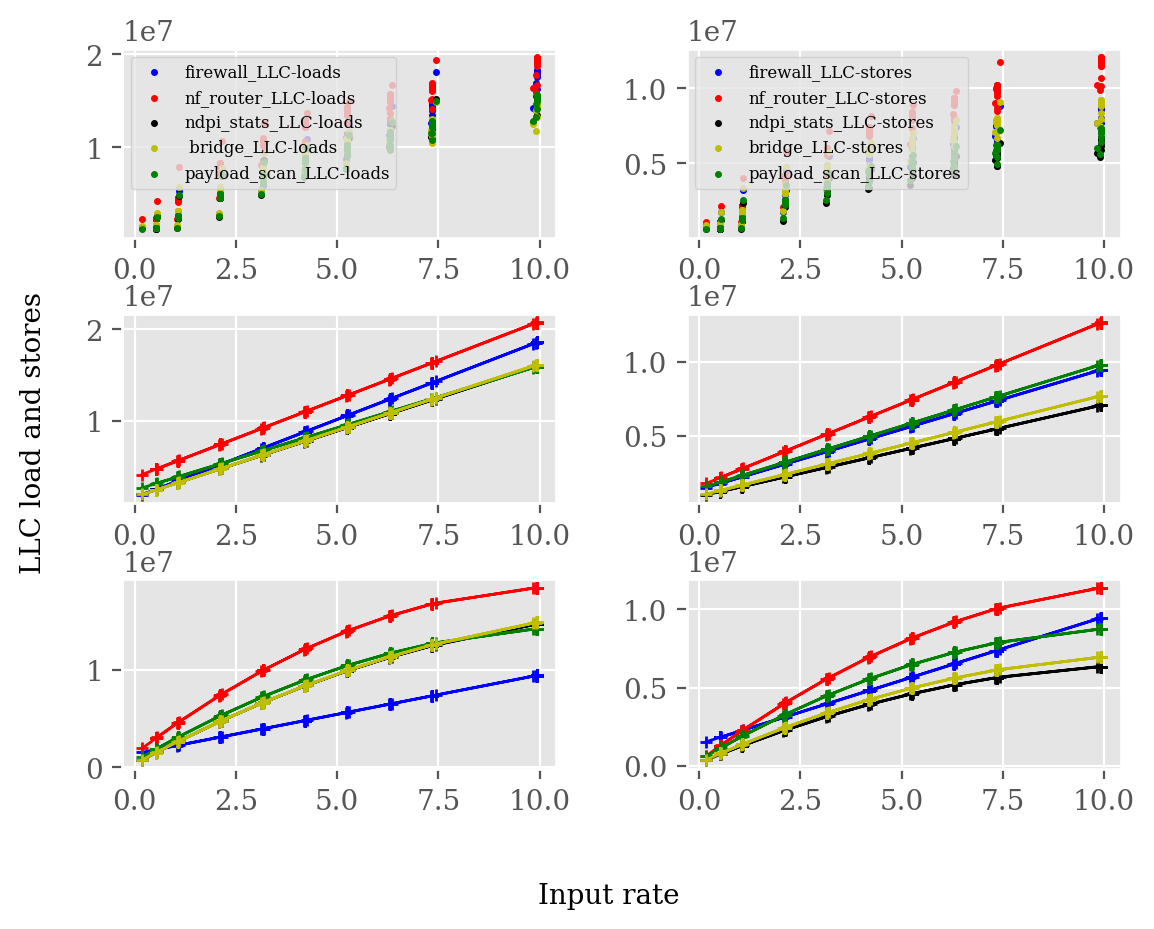

In [42]:
a = list(data['input_rate']/1000)

# LLC-loads
b = list(data['firewall_LLC-loads'])
[a1, b1] = plot_cor(a, b)
e = list(data['nf_router_LLC-loads'])
[a4, e1] = plot_cor(a, e)
f = list(data['ndpi_stats_LLC-loads'])
[a5, f1] = plot_cor(a, f)
g = list(data['bridge_LLC-loads'])
[a6, g1] = plot_cor(a, g)
h = list(data['payload_scan_LLC-loads'])
[a7, h1] = plot_cor(a, h)


# LLC-stores 
i = list(data['firewall_LLC-stores'])
j = list(data['nf_router_LLC-stores'])
k = list(data['ndpi_stats_LLC-stores'])
l = list(data['bridge_LLC-stores'])
m = list(data['payload_scan_LLC-stores'])


y_pred_f,r2_f = linear_regression(list(data['input_rate']),b)
y_pred_nf,r2_nf = linear_regression(list(data['input_rate']), e)
y_pred_ndpi,r2_ndpi = linear_regression(list(data['input_rate']), f)
y_pred_pl,r2_pl = linear_regression(list(data['input_rate']), g)
y_pred_bg,r2_bg = linear_regression(list(data['input_rate']), h)

#fig = plt.figure(figsize=(4, 8)) # adjust the height as needed
fig, ax = plt.subplots(3,2)
plt.style.use('ggplot')

#fig.suptitle('Correlation between traffic and VNF LLC-loads', size='10')
l4 = ax[0][0].scatter(a, b, c='b', label='firewall_LLC-loads', s=4)
l4 = ax[0][0].scatter(a, e, c='r', label='nf_router_LLC-loads', s=4)
l4 = ax[0][0].scatter(a, f, c='k', label='ndpi_stats_LLC-loads', s=4)
l4 = ax[0][0].scatter(a, g, c='y', label=' bridge_LLC-loads', s=4)
l4 = ax[0][0].scatter(a, h, c='g', label='payload_scan_LLC-loads', s=4)
ax[0][0].legend(loc="upper left",fontsize =6)


l4 = ax[0][1].scatter(a, i, c='b', label='firewall_LLC-stores', s=4)
l4 = ax[0][1].scatter(a, j, c='r', label='nf_router_LLC-stores', s=4)
l4 = ax[0][1].scatter(a, k, c='k', label='ndpi_stats_LLC-stores', s=4)
l4 = ax[0][1].scatter(a, l, c='y', label='bridge_LLC-stores', s=4)
l4 = ax[0][1].scatter(a, m, c='g', label='payload_scan_LLC-stores', s=4)
ax[0][1].legend(loc="upper left",fontsize =6)




#fig.suptitle('Correlation between traffic and VNF LLC-loads', size='10')
l4 = ax[1][0].plot(list(data['input_rate']/1000), y_pred_f, c='b', linewidth=1, marker = '+', markersize=4, label='firewall_LLC-loads')
l4 = ax[1][0].plot(list(data['input_rate']/1000), y_pred_nf, c='r', linewidth=1, marker = '+', markersize=4,label='nf_router_LLC-loads')
l4 = ax[1][0].plot(list(data['input_rate']/1000), y_pred_ndpi, c='k', linewidth=1, marker = '+',markersize=4, label='ndpi_stats_LLC-loads')
l4 = ax[1][0].plot(list(data['input_rate']/1000), y_pred_pl, c='g', linewidth=1, marker = '+', markersize=4, label='bridge_LLC-loads')
l4 = ax[1][0].plot(list(data['input_rate']/1000), y_pred_bg, c='y', linewidth=1, marker = '+', markersize=4, label='payload_scan_LLC-loads')
#ax[1][0].legend(loc="upper right", fontsize=4)


print(f"{r2_f:.2f},{r2_nf:.2f},{r2_ndpi:.2f},{r2_pl:.2f},{r2_bg:.2f}")


y_pred_f,r2_f = linear_regression(list(data['input_rate']),i)
y_pred_nf,r2_nf = linear_regression(list(data['input_rate']), j)
y_pred_ndpi,r2_ndpi = linear_regression(list(data['input_rate']), k)
y_pred_pl,r2_pl = linear_regression(list(data['input_rate']), l)
y_pred_bg,r2_bg = linear_regression(list(data['input_rate']), m)


#fig.suptitle('Correlation between traffic and VNF LLC-loads', size='10')
l4 = ax[1][1].plot(list(data['input_rate']/1000), y_pred_f, c='b', linewidth=1, marker = '+', markersize=4, label='firewall_LLC-loads')
l4 = ax[1][1].plot(list(data['input_rate']/1000), y_pred_nf, c='r', linewidth=1, marker = '+', markersize=4,label='nf_router_LLC-loads')
l4 = ax[1][1].plot(list(data['input_rate']/1000), y_pred_ndpi, c='k', linewidth=1, marker = '+',markersize=4, label='ndpi_stats_LLC-loads')
l4 = ax[1][1].plot(list(data['input_rate']/1000), y_pred_pl, c='g', linewidth=1, marker = '+', markersize=4, label='bridge_LLC-loads')
l4 = ax[1][1].plot(list(data['input_rate']/1000), y_pred_bg, c='y', linewidth=1, marker = '+', markersize=4, label='payload_scan_LLC-loads')
#ax[1][1].legend(loc="upper right", fontsize=4)

print(f"{r2_f:.2f},{r2_nf:.2f},{r2_ndpi:.2f},{r2_pl:.2f},{r2_bg:.2f}")


# polynomial regression
coeffs, y_pred, r2 = polynomial_regression(list(data['input_rate']), b, degree=2)
coeffs_nf, y_pred_nf, r2_nf = polynomial_regression(list(data['input_rate']), e, degree=2)
coeffs_ndpi, y_pred_ndpi, r2_ndpi = polynomial_regression(list(data['input_rate']), list(data['ndpi_stats_LLC-loads']), degree=2)
coeffs_pl, y_pred_pl, r2_pl =polynomial_regression(list(data['input_rate']), list(data['bridge_LLC-loads']), degree=2)
coeffs_bg, y_pred_bg, r2_bg = polynomial_regression(list(data['input_rate']), list(data['payload_scan_LLC-loads']), degree=2)

#fig.suptitle('Correlation between traffic and VNF LLC-loads', size='10')
l4 = ax[2][0].plot(list(data['input_rate']/1000), y_pred_f, c='b', linewidth=1, marker = '+', markersize=4, label='firewall_LLC-loads')
l4 = ax[2][0].plot(list(data['input_rate']/1000), y_pred_nf, c='r', linewidth=1, marker = '+', markersize=4,label='nf_router_LLC-loads')
l4 = ax[2][0].plot(list(data['input_rate']/1000), y_pred_ndpi, c='k', linewidth=1, marker = '+',markersize=4, label='ndpi_stats_LLC-loads')
l4 = ax[2][0].plot(list(data['input_rate']/1000), y_pred_pl, c='g', linewidth=1, marker = '+', markersize=4, label='bridge_LLC-loads')
l4 = ax[2][0].plot(list(data['input_rate']/1000), y_pred_bg, c='y', linewidth=1, marker = '+', markersize=4, label='payload_scan_LLC-loads')
#ax[1][1].legend(loc="upper right", fontsize=6)


print(f"{r2_f:.2f},{r2_nf:.2f},{r2_ndpi:.2f},{r2_pl:.2f},{r2_bg:.2f}")


# polynomial regression
coeffs, y_pred, r2 = polynomial_regression(list(data['input_rate']), i, degree=2)
coeffs_nf, y_pred_nf, r2_nf = polynomial_regression(list(data['input_rate']), j, degree=2)
coeffs_ndpi, y_pred_ndpi, r2_ndpi = polynomial_regression(list(data['input_rate']), k, degree=2)
coeffs_pl, y_pred_pl, r2_pl =polynomial_regression(list(data['input_rate']), l, degree=2)
coeffs_bg, y_pred_bg, r2_bg = polynomial_regression(list(data['input_rate']), m, degree=2)

#fig.suptitle('Correlation between traffic and VNF LLC-loads', size='10')
l4 = ax[2][1].plot(list(data['input_rate']/1000), y_pred_f, c='b', linewidth=1, marker = '+', markersize=4, label='firewall_LLC-loads')
l4 = ax[2][1].plot(list(data['input_rate']/1000), y_pred_nf, c='r', linewidth=1, marker = '+', markersize=4,label='nf_router_LLC-loads')
l4 = ax[2][1].plot(list(data['input_rate']/1000), y_pred_ndpi, c='k', linewidth=1, marker = '+',markersize=4, label='ndpi_stats_LLC-loads')
l4 = ax[2][1].plot(list(data['input_rate']/1000), y_pred_pl, c='g', linewidth=1, marker = '+', markersize=4, label='bridge_LLC-loads')
l4 = ax[2][1].plot(list(data['input_rate']/1000), y_pred_bg, c='y', linewidth=1, marker = '+', markersize=4, label='payload_scan_LLC-loads')
#ax[2][1].legend(loc="upper right", fontsize=6)


print(f"{r2_f:.2f},{r2_nf:.2f},{r2_ndpi:.2f},{r2_pl:.2f},{r2_bg:.2f}")


fig.text(0.5, 0.01, "Input rate", size='10', ha='center')
fig.text(0.04, 0.5, 'LLC load and stores', size='10', va='center', rotation='vertical')
plt.subplots_adjust(left=0.12, right=0.9, bottom=0.15, top=0.9, wspace=0.3, hspace=0.4)


plt.show()

# Principal component analysis

11036


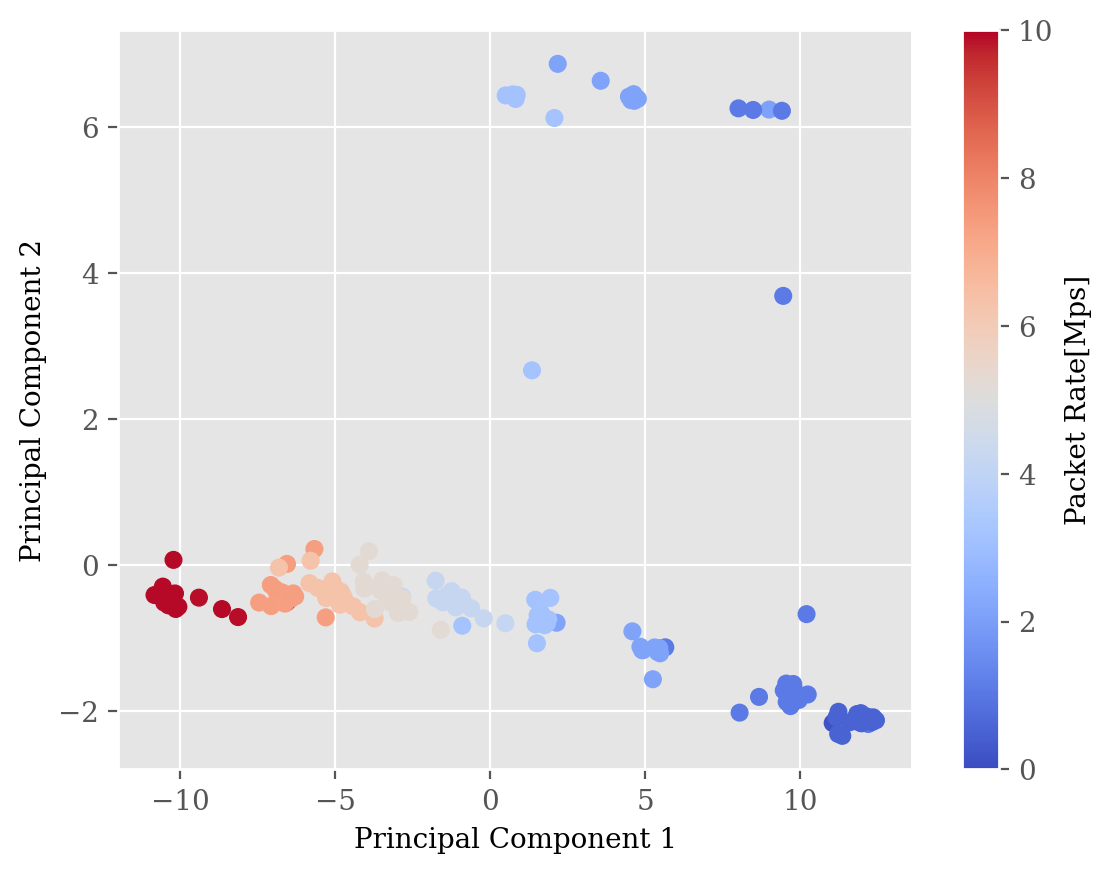

(178, 2)
Eigenvectors:
 [[-0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1
   0.1  0.1  0.   0.1  0.1  0.1  0.1  0.  -0.1 -0.1 -0.1 -0.1 -0.1 -0.1
  -0.1 -0.1 -0.1 -0.1 -0.   0.   0.   0.  -0.  -0.1 -0.1 -0.1 -0.1 -0.1
   0.1  0.1  0.1  0.1  0.1 -0.1 -0.1 -0.1 -0.1 -0.1 -0.1 -0.1 -0.1 -0.1
  -0.1 -0.1 -0.1 -0.1 -0.1 -0.1]
 [-0.  -0.   0.   0.   0.   0.  -0.4  0.   0.   0.   0.  -0.4  0.  -0.
  -0.  -0.1 -0.4  0.  -0.  -0.  -0.  -0.4  0.  -0.  -0.  -0.  -0.  -0.
  -0.  -0.  -0.  -0.   0.  -0.   0.  -0.  -0.4 -0.  -0.  -0.  -0.  -0.
   0.   0.   0.   0.  -0.4  0.  -0.  -0.  -0.  -0.  -0.  -0.  -0.  -0.
  -0.  -0.  -0.  -0.  -0.  -0. ]]
Eigenvalues:
 [48.1  5.5]


In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from matplotlib.colors import Normalize
import matplotlib as mp


# Load CSV data
current_dir = os.getcwd()
exp_ls_csv  = "load_stimulus_" + exp_ls + ".csv"
file_path = os.path.abspath(os.path.join("..\\dag-1\\datasets", exp_ls_csv))
df = pd.read_csv(file_path, index_col=0)
df = data.replace(['<not counted>'], np.nan)

# Separate the target column from the other columns
target_col = 'input_rate'
independent_variables = df.drop(target_col, axis=1)
dependent_variable = df[target_col].div(1000)

# Scale the independent variables
scaler = StandardScaler()
independent_variables_scaled = scaler.fit_transform(independent_variables)
print(np.size(independent_variables_scaled))

# Perform PCA
pca = PCA()
pca.n_components =2
pca.fit(independent_variables_scaled)
independent_variables_pca = pca.transform(independent_variables_scaled)

# Get unique values in the dependent variable column
unique_values = dependent_variable.unique()

# Define a colormap based on the unique values
cmap = mp.colormaps.get_cmap('coolwarm')

# Create a scatter plot with colored points
normalize = Normalize(vmin=0, vmax=10)
plt.scatter(independent_variables_pca[:, 0], independent_variables_pca[:, 1],
            c=dependent_variable, cmap=cmap, norm=normalize)


# Add a color bar to the plot
cbar = plt.colorbar()
cbar.set_label('Packet Rate[Mps]')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

#save figure
abs_path = os.path.join("..\\dag-1\\figure", "pca_"+ exp_ls +'.pdf')
plt.savefig(abs_path)
plt.show()


# Print the eigenvectors and eigenvalues with one decimal place
print(np.shape(independent_variables_pca))
a = np.round(pca.components_, 1)
b=np.round(pca.explained_variance_, 1)
print("Eigenvectors:\n", np.round(pca.components_, 1))
print("Eigenvalues:\n", np.round(pca.explained_variance_, 1))

dependent_variable:9929.7986543658
11036
(178, 5)
PCA explained variance ratio: [0.7720832  0.08761478]


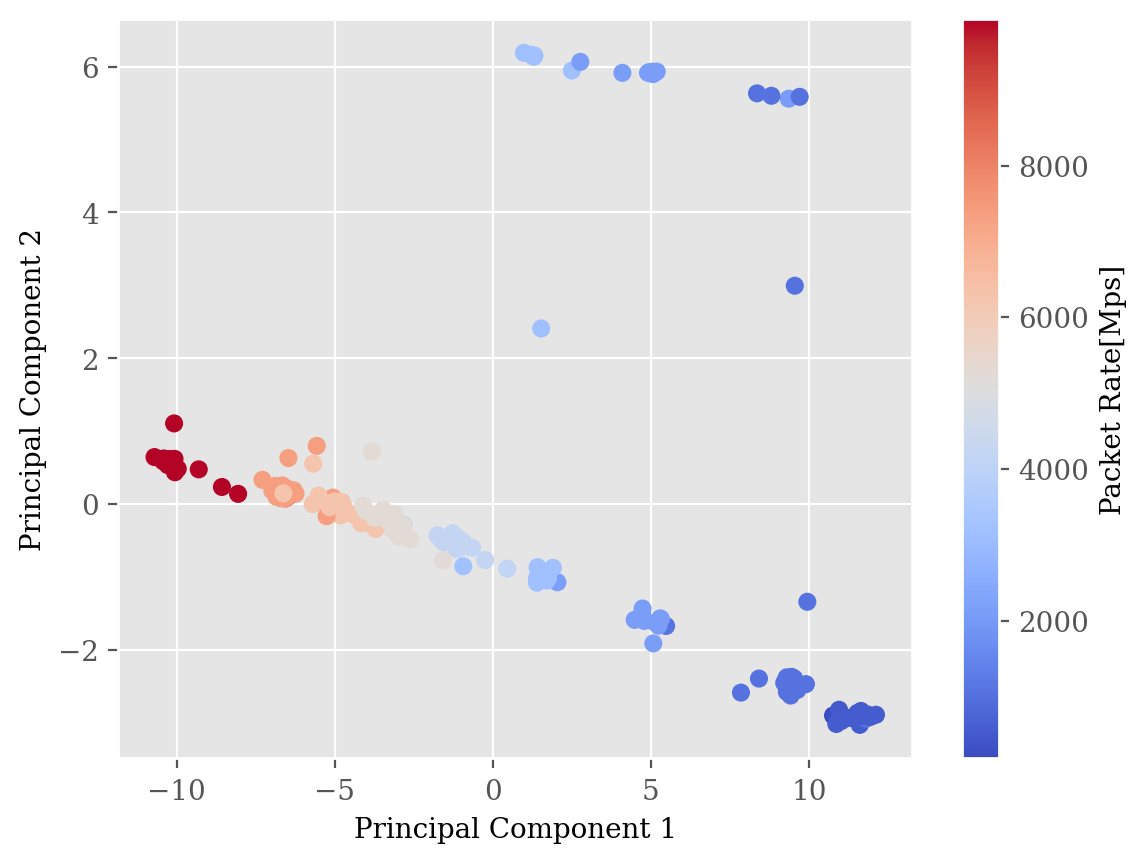

(178, 5)
Eigenvectors:
 [[-0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1
   0.1  0.1  0.   0.1  0.1  0.1  0.1  0.  -0.1 -0.1 -0.1 -0.1 -0.1 -0.1
  -0.1 -0.1 -0.1 -0.1 -0.   0.   0.   0.  -0.  -0.1 -0.1 -0.1 -0.1 -0.1
   0.1  0.1  0.1  0.1  0.1 -0.1 -0.1 -0.1 -0.1 -0.1 -0.1 -0.1 -0.1 -0.1
  -0.1 -0.1 -0.1 -0.1 -0.1 -0.1]
 [-0.  -0.   0.   0.   0.   0.  -0.4  0.   0.   0.   0.  -0.4  0.  -0.
  -0.  -0.1 -0.4  0.  -0.  -0.  -0.  -0.4  0.  -0.  -0.  -0.  -0.  -0.
  -0.  -0.  -0.  -0.   0.  -0.   0.  -0.  -0.4 -0.  -0.  -0.  -0.  -0.
   0.   0.   0.   0.  -0.4  0.  -0.  -0.  -0.  -0.  -0.  -0.  -0.  -0.
  -0.  -0.  -0.  -0.  -0.  -0. ]]
Eigenvalues:
 [48.1  5.5]


In [44]:
#spca

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from matplotlib.colors import Normalize
import matplotlib as mp
from sklearn.decomposition import SparsePCA
from sklearn.preprocessing import StandardScaler


# Load CSV data
current_dir = os.getcwd()
exp_ls_csv  = "load_stimulus_" + exp_ls + ".csv"
file_path = os.path.abspath(os.path.join("..\\dag-1\\datasets", exp_ls_csv))
df = pd.read_csv(file_path, index_col=0)
df = data.replace(['<not counted>'], np.nan)

# Separate the target column from the other columns
target_col = 'input_rate'
dependent_variable = df[target_col]
independent_variables = df.drop(target_col, axis=1)
print(f'dependent_variable:{max(dependent_variable)}')



# Scale the independent variables
scaler = StandardScaler()
independent_variables_scaled = scaler.fit_transform(independent_variables)
print(np.size(independent_variables_scaled))


# Perform PCA
spca = SparsePCA(n_components=5, alpha =3)

# Fit the Sparse PCA model to the data
spca.fit(independent_variables_scaled)

# Transform the data into the reduced-dimension representation
X_spca = spca.transform(independent_variables_scaled)
independent_variables_pca = spca.transform(independent_variables_scaled)
unique_values = dependent_variable.unique()

# Define colormap 
cmap = mp.colormaps.get_cmap('coolwarm')

# Create a scatter plot with colored points
normalize = Normalize(vmin=min(df[target_col]), vmax=max(df[target_col]))
plt.scatter(independent_variables_pca[:, 0], independent_variables_pca[:, 1],
            c=dependent_variable, cmap=cmap, norm=normalize)

print(np.shape(independent_variables_pca))


# Get the explained variance ratio
cov_matrix = np.cov(independent_variables_scaled.T)
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
explained_variance_ratio = eigenvalues / np.sum(eigenvalues)

print("PCA explained variance ratio:", pca.explained_variance_ratio_)


# Add a color bar to the plot
cbar = plt.colorbar()
cbar.set_label('Packet Rate[Mps]')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')


plt.show()

# Print the eigenvectors and eigenvalues with one decimal place
print(np.shape(independent_variables_pca))
a = np.round(pca.components_, 1)
b=np.round(pca.explained_variance_, 1)
print("Eigenvectors:\n", np.round(pca.components_, 1))
print("Eigenvalues:\n", np.round(pca.explained_variance_, 1))
